In [2]:
import numpy as np
from skimage.transform import resize
import pylidc as pl
from sklearn.model_selection import train_test_split
from unet import UNet

Using TensorFlow backend.


In [3]:
scans = pl.query(pl.Scan)
n = scans.count()

In [4]:
image_size = (256, 256)

In [5]:
def get_data(i, only_nodules=True):
    scan = scans[i]
    images = scan.load_all_dicom_images(verbose=False)
    n = len(images)
    X = np.array([resize(im.pixel_array, image_size, mode='constant') for im in images])
    X = np.expand_dims(X, axis=-1)
    y = np.zeros((512, 512, n))
    for ann in scan.annotations:
        b = ann.bbox()
        y[b] = np.logical_or(y[b], ann.boolean_mask())
    y = np.rollaxis(y, 2, 0)
    y = resize(y, (n, *image_size), mode='constant')
    if only_nodules:
        indices = [l.sum() > 0 for l in y]
        X = X[indices]
        y = y[indices]
    y = np.expand_dims(y, axis=-1)
    return X, y

In [7]:
train, test = train_test_split(range(n))

In [10]:
model = UNet((*image_size, 1), batchnorm=True, dropout=False)
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
for _ in range(200):
    while True:
        i = np.random.choice(train)
        print(i)
        try:
            X, y = get_data(i)
            if len(X):
                model.fit(X, y, batch_size=1, epochs=3)
                break
            else:
                print('No nodules!')
        except OSError:
            print('Problem getting data')

160
Epoch 1/3
14/14 [==============================] - 19s 1s/step - loss: 0.7354 - acc: 0.6271
Epoch 2/3
14/14 [==============================] - 4s 315ms/step - loss: 0.6053 - acc: 0.9473
Epoch 3/3
14/14 [==============================] - 4s 317ms/step - loss: 0.5446 - acc: 0.9984
490
Epoch 1/3
23/23 [==============================] - 7s 311ms/step - loss: 0.4647 - acc: 0.9993
Epoch 2/3
23/23 [==============================] - 7s 314ms/step - loss: 0.3631 - acc: 0.9994
Epoch 3/3
23/23 [==============================] - 7s 317ms/step - loss: 0.2676 - acc: 0.9994
497
Epoch 1/3
19/19 [==============================] - 6s 311ms/step - loss: 0.1959 - acc: 0.9998
Epoch 2/3
19/19 [==============================] - 6s 312ms/step - loss: 0.1451 - acc: 0.9998
Epoch 3/3
19/19 [==============================] - 6s 315ms/step - loss: 0.1087 - acc: 0.9998
451
Epoch 1/3
18/18 [==============================] - 6s 315ms/step - loss: 0.0860 - acc: 0.9986
Epoch 2/3
18/18 [=============================

3/3 [==============================] - 1s 313ms/step - loss: 0.0032 - acc: 0.9996
Epoch 3/3
3/3 [==============================] - 1s 312ms/step - loss: 0.0029 - acc: 0.9996
805
Epoch 1/3
55/55 [==============================] - 17s 318ms/step - loss: 0.0034 - acc: 0.9994
Epoch 2/3
55/55 [==============================] - 17s 313ms/step - loss: 0.0023 - acc: 0.9995
Epoch 3/3
55/55 [==============================] - 18s 320ms/step - loss: 0.0017 - acc: 0.9996
56
Epoch 1/3
19/19 [==============================] - 6s 313ms/step - loss: 0.0022 - acc: 0.9997
Epoch 2/3
19/19 [==============================] - 6s 312ms/step - loss: 0.0018 - acc: 0.9997
Epoch 3/3
19/19 [==============================] - 6s 317ms/step - loss: 0.0018 - acc: 0.9997
83
Epoch 1/3
7/7 [==============================] - 2s 313ms/step - loss: 0.0102 - acc: 0.9981
Epoch 2/3
7/7 [==============================] - 2s 314ms/step - loss: 0.0073 - acc: 0.9979
Epoch 3/3
7/7 [==============================] - 2s 318ms/step - 

12/12 [==============================] - 4s 316ms/step - loss: 0.0024 - acc: 0.9996
875
Epoch 1/3
3/3 [==============================] - 1s 309ms/step - loss: 0.0016 - acc: 0.9997
Epoch 2/3
3/3 [==============================] - 1s 315ms/step - loss: 0.0015 - acc: 0.9997
Epoch 3/3
3/3 [==============================] - 1s 316ms/step - loss: 0.0014 - acc: 0.9997
538
Epoch 1/3
4/4 [==============================] - 1s 314ms/step - loss: 0.0043 - acc: 0.9992
Epoch 2/3
4/4 [==============================] - 1s 312ms/step - loss: 0.0033 - acc: 0.9992
Epoch 3/3
4/4 [==============================] - 1s 311ms/step - loss: 0.0030 - acc: 0.9992
399
Epoch 1/3
8/8 [==============================] - 2s 309ms/step - loss: 0.0014 - acc: 0.9998
Epoch 2/3
8/8 [==============================] - 2s 312ms/step - loss: 0.0011 - acc: 0.9998
Epoch 3/3
8/8 [==============================] - 3s 319ms/step - loss: 0.0010 - acc: 0.9998
872
Epoch 1/3
6/6 [==============================] - 2s 312ms/step - loss: 0

Epoch 2/3
8/8 [==============================] - 3s 318ms/step - loss: 0.0029 - acc: 0.9994
Epoch 3/3
8/8 [==============================] - 3s 317ms/step - loss: 0.0024 - acc: 0.9994
873
Epoch 1/3
8/8 [==============================] - 2s 310ms/step - loss: 0.0017 - acc: 0.9998
Epoch 2/3
8/8 [==============================] - 2s 312ms/step - loss: 0.0015 - acc: 0.9998
Epoch 3/3
8/8 [==============================] - 3s 313ms/step - loss: 0.0014 - acc: 0.9998
988
Epoch 1/3
18/18 [==============================] - 6s 313ms/step - loss: 0.0019 - acc: 0.9997
Epoch 2/3
18/18 [==============================] - 6s 317ms/step - loss: 0.0017 - acc: 0.9997
Epoch 3/3
18/18 [==============================] - 6s 320ms/step - loss: 0.0016 - acc: 0.9997
601
Epoch 1/3
4/4 [==============================] - 1s 311ms/step - loss: 0.0042 - acc: 0.9993
Epoch 2/3
4/4 [==============================] - 1s 313ms/step - loss: 0.0038 - acc: 0.9993
Epoch 3/3
4/4 [==============================] - 1s 314ms/step

25/25 [==============================] - 8s 315ms/step - loss: 0.0073 - acc: 0.9985
Epoch 2/3
25/25 [==============================] - 8s 322ms/step - loss: 0.0039 - acc: 0.9986
Epoch 3/3
25/25 [==============================] - 8s 321ms/step - loss: 0.0021 - acc: 0.9992
610
Epoch 1/3
49/49 [==============================] - 16s 319ms/step - loss: 0.0028 - acc: 0.9990
Epoch 2/3
49/49 [==============================] - 15s 313ms/step - loss: 0.0017 - acc: 0.9992
Epoch 3/3
49/49 [==============================] - 16s 320ms/step - loss: 0.0013 - acc: 0.9993
292


In [41]:
model.save('unet.hdf5')

In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
X, y = get_data(np.random.choice(test), only_nodules=False)
preds = model.predict(X, batch_size=1)
fpr, tpr, _ = roc_curve(np.rint(y).flatten(), preds.flatten())

In [49]:
auc(fpr, tpr)

0.48529045245852664

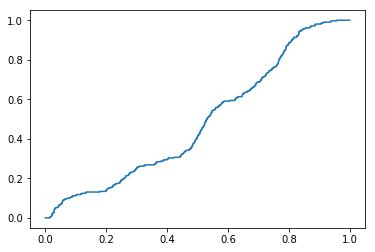

In [50]:
plt.plot(fpr, tpr)